In [173]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

### Data import & basic visualization

In [95]:
df = pd.read_csv("all_data.csv")
df = df.dropna()
df[['sink']] = df[['sink']]*-1
X = df[['co2', 'temp']]
y = df[['sink']]

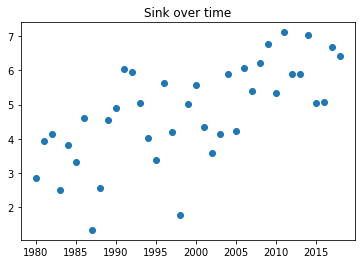

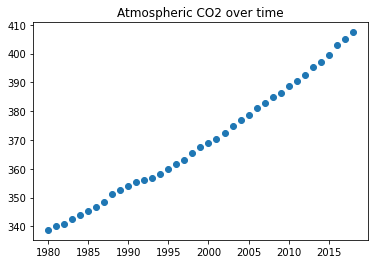

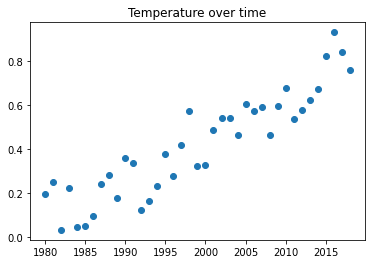

In [96]:
plt.scatter(df[['year']], df[['sink']])
plt.title("Sink over time")
plt.show()

plt.scatter(df[['year']], df[['co2']])
plt.title("Atmospheric CO2 over time")
plt.show()

plt.scatter(df[['year']], df[['temp']])
plt.title("Temperature over time")
plt.show()

## Linear Regressions

### Single variable: CO_2

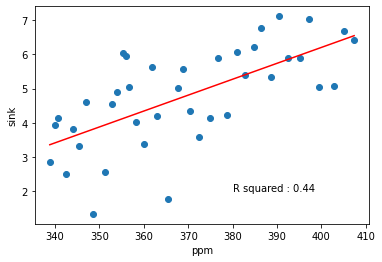

In [170]:
reg_co2 = linear_model.LinearRegression()
reg_co2.fit(X[['co2']], y)

plt.scatter(X[['co2']], y)
plt.xlabel("ppm")
plt.ylabel("sink")
plt.text(380, 2, "R squared : {}".format(round(reg_co2.score(X[['co2']], y), 2)))
plt.plot(X[['co2']], reg_co2.coef_*X[['co2']] + reg_co2.intercept_, "r")
plt.show()

### Single variable: temperature

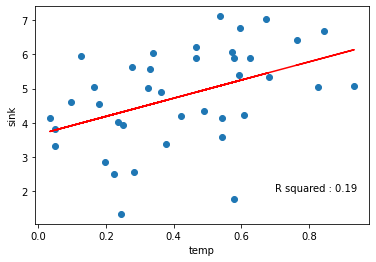

In [169]:
reg_temp = linear_model.LinearRegression()
reg_temp.fit(X[['temp']], y)

plt.scatter(X[['temp']], y)
plt.xlabel("temp")
plt.ylabel("sink")
plt.text(0.7, 2, "R squared : {}".format(round(reg_temp.score(X[['temp']], y), 2)))
plt.plot(X[['temp']], reg_temp.coef_*X[['temp']] + reg_temp.intercept_, "r")
plt.show()


### CO2 and temperature

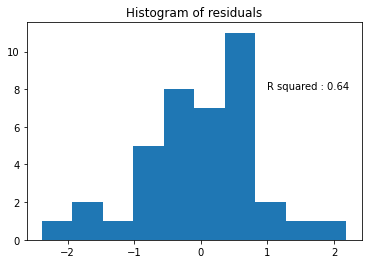

array([[ 0.12183719, -7.04369582]])

In [201]:
# Multiple linear regression
reg = linear_model.LinearRegression()
reg.fit(X, y)

type((reg.predict(X) - y).values)

plt.hist((reg.predict(X) - y).values)
plt.title("Histogram of residuals")
plt.text(1, 8, "R squared : {}".format(round(reg.score(X, y), 2)))
plt.show()

reg.coef_

## Cross validation

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6411609367471991

In [195]:
reg_w_crossval = linear_model.LinearRegression()
scores = cross_val_score(reg_w_crossval, X, y)
scores

array([-0.41108082, -0.12687868,  0.47825468,  0.25491916,  0.04425223])

In [199]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6411609367471991

In [115]:
residuals = reg.predict(X_test) - y_test
reg.score(X_test, y_test)

0.5323676920625904